In [337]:
!pwd

/Users/amierzuhri/code/JplepeckiBR/PCA/notebooks


In [338]:
from PIL import Image
import numpy as np
from PIL import Image
import os

# Check the current working directory
print("Current Working Directory:", os.getcwd())

# Correct path considering the script location
base_dir = "/Users/amierzuhri/code/JplepeckiBR/PCA/raw_data/facial_segmentation"
image_path = os.path.join(base_dir, "image/0099_0009.jpg")
mask_path = os.path.join(base_dir, "mask/0099_0009.png")

# Try opening the image
try:
    background = Image.open(image_path)
    foreground = Image.open(mask_path)
    print("Images opened successfully.")
except FileNotFoundError as e:
    print(f"Error: {e}")

Current Working Directory: /Users/amierzuhri/code/JplepeckiBR/PCA/notebooks
Images opened successfully.


In [339]:
background = Image.open(image_path)

In [340]:
foreground = Image.open(mask_path)

In [341]:
R = np.array(background)[:,:,0]

In [342]:
G = np.array(background)[:,:,1]

In [343]:
B = np.array(background)[:,:,2]

In [344]:
RGB = np.dstack(((R*np.array(foreground)),(G*np.array(foreground)) ,(B*np.array(foreground))))
RGB[0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

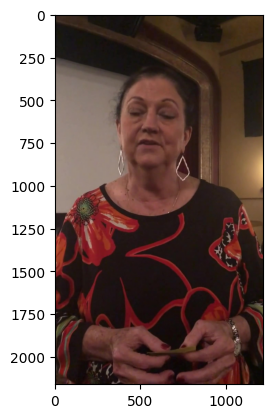

In [345]:
import matplotlib.pyplot as plt
plt.imshow(np.array(background))

In [346]:
set(np.array(foreground).flatten())

{0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 13, 14}

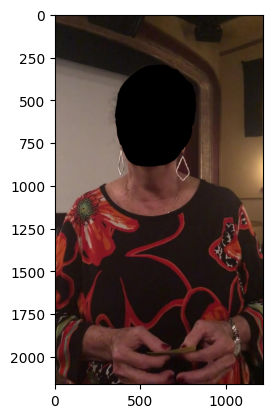

In [347]:
everything_but_the_face = np.dstack((R*(np.array(foreground)==0),G*(np.array(foreground)==0) ,B*(np.array(foreground)==0)))
plt.imshow(everything_but_the_face )

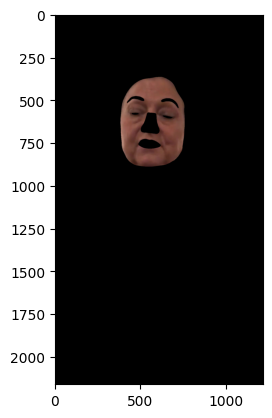

In [348]:
skin = np.dstack((R*(np.array(foreground)==1),G*(np.array(foreground)==1) ,B*(np.array(foreground)==1)))
plt.imshow(skin)

In [349]:
right_brow = np.dstack((R*(np.array(foreground) ==2),G*(np.array(foreground) ==2) ,B*(np.array(foreground)==2)))

In [350]:
left_brow = np.dstack((R*(np.array(foreground)==3),G*(np.array(foreground)==3) ,B*(np.array(foreground)==3)))

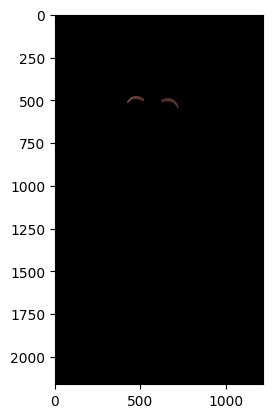

In [351]:
brows = right_brow + left_brow
plt.imshow(brows)

In [352]:
right_eye = np.dstack((R*(np.array(foreground)==4),G*(np.array(foreground)==4) ,B*(np.array(foreground)==4)))


In [353]:
left_eye = np.dstack((R*(np.array(foreground)==5),G*(np.array(foreground)==5) ,B*(np.array(foreground)==5)))

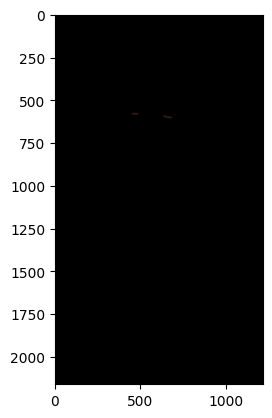

In [354]:
eyes = left_eye + right_eye
plt.imshow(eyes)

In [355]:
lowerlip = np.dstack((R*(np.array(foreground)==7),G*(np.array(foreground)==7) ,B*(np.array(foreground)==7)))


In [356]:
upperlip = np.dstack((R*(np.array(foreground)==9),G*(np.array(foreground)==9) ,B*(np.array(foreground)==9)))


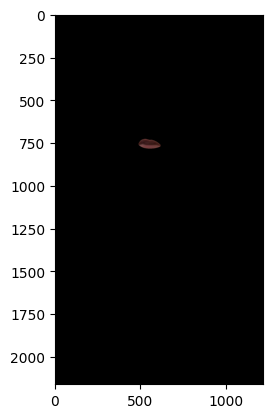

In [357]:
lips = upperlip + lowerlip
plt.imshow(lips)

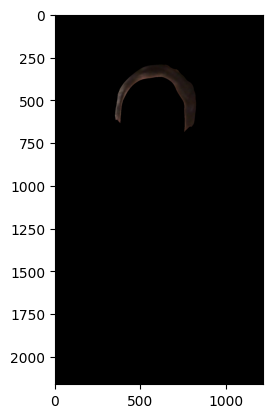

In [358]:
hair = np.dstack((R*(np.array(foreground)==10),G*(np.array(foreground)==10) ,B*(np.array(foreground)==10)))
plt.imshow(hair)


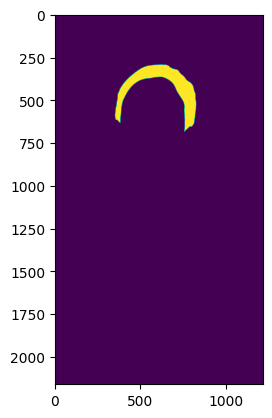

In [359]:
plt.imshow(np.array(foreground)==10)

In [360]:
type(hair)

numpy.ndarray

In [361]:
## Calculate the mean for each channel
#mean_red = np.mean(non_zero_pixels[:, 0])
#mean_green = np.mean(non_zero_pixels[:, 1])
#mean_blue = np.mean(non_zero_pixels[:, 2])
def average_color(segment):
    """
    Finds the average color of a segment by filtering out background pixels and calculating the mean RGB value.

    Args:
    segment (numpy.ndarray): A 3D numpy array representing a segment of an image (height, width, RGB).

    Returns:
    tuple: A tuple of three integers representing the average RGB color.
    """
    # Flatten the segment to (num_pixels, 3)
    flat_segment = segment.reshape(-1, 3)

    # Filter out zero pixels (background) by checking where any of the channels is non-zero
    non_zero_pixels = flat_segment[np.any(flat_segment != 0, axis=1)]

    # If there are no non-zero pixels, return a default color (e.g., black)
    if len(non_zero_pixels) == 0:
        return (0, 0, 0)

    # Calculate the mean for each channel
    mean_red = np.mean(non_zero_pixels[:, 0])
    mean_green = np.mean(non_zero_pixels[:, 1])
    mean_blue = np.mean(non_zero_pixels[:, 2])

    # Return the mean values as a tuple of integers
    return (int(mean_red), int(mean_green), int(mean_blue))


In [362]:
average_skin_color = average_color(skin)
average_brows_color = average_color(brows)
average_eyes_color = average_color(eyes)
average_lips_color = average_color(lips)
average_hair_color = average_color(hair)

In [363]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(color1, color2):
    """
    Calculate the Euclidean distance between two RGB colors.
    """
    R1, G1, B1 = color1
    R2, G2, B2 = color2
    return np.sqrt((R1 - R2) ** 2 + (G1 - G2) ** 2)

def knn_closest_colors(target_color, color_palette, k=3):
    """
    Find the K closest colors from a palette to the target color using Euclidean distance.

    Args:
    target_color (tuple): RGB values of the target color.
    color_palette (list): List of RGB tuples representing the color palette.
    k (int): Number of closest colors to find.

    Returns:
    list: The K closest RGB colors from the palette.
    """
    distances = [(color, euclidean_distance(target_color, color)) for color in color_palette]
    distances.sort(key=lambda x: x[1])  # Sort by distance
    return [color for color, _ in distances[:k]]

def visualize_color(color, title):
    """
    Visualize a solid color image.

    Args:
    color (tuple): RGB tuple representing the color to visualize.
    title (str): The title of the plot.
    """
    # Create a 100x100 image of the specified color
    image = np.ones((100, 100, 3))
    image[:, :, 0] *= color[0] / 255.0
    image[:, :, 1] *= color[1] / 255.0
    image[:, :, 2] *= color[2] / 255.0

    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

def visualize_palette(palette, title):
    """
    Visualize a palette of colors in a horizontal bar.

    Args:
    palette (list): List of RGB tuples representing the color palette.
    title (str): The title of the plot.
    """
    # Create an image with a row of color blocks
    palette_image = np.ones((50, len(palette) * 50, 3))
    for i, color in enumerate(palette):
        palette_image[:, i * 50:(i + 1) * 50] = [c / 255.0 for c in color]

    plt.imshow(palette_image)
    plt.title(title)
    plt.axis('off')
    plt.show()


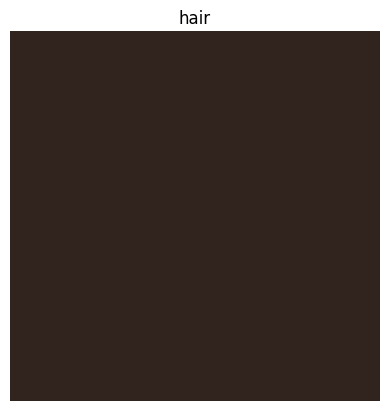

In [364]:
visualize_color(average_hair_color, "hair")

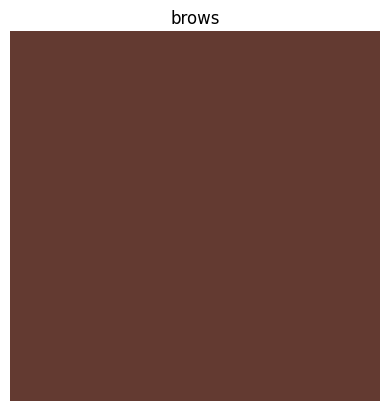

In [365]:
visualize_color(average_brows_color, "brows")

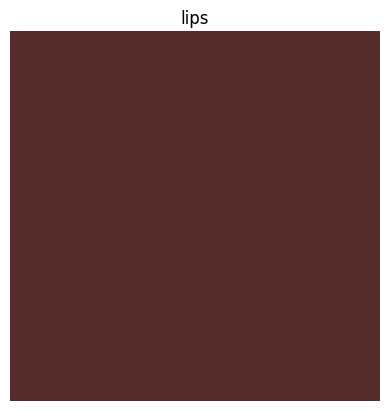

In [366]:
visualize_color(average_lips_color, "lips")

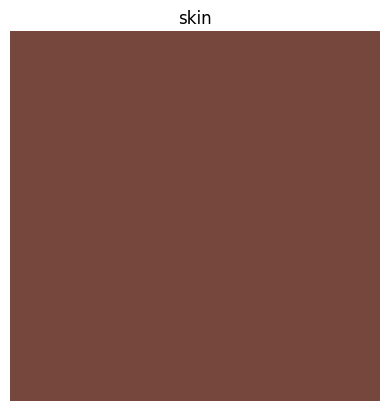

In [367]:
visualize_color(average_skin_color, "skin")

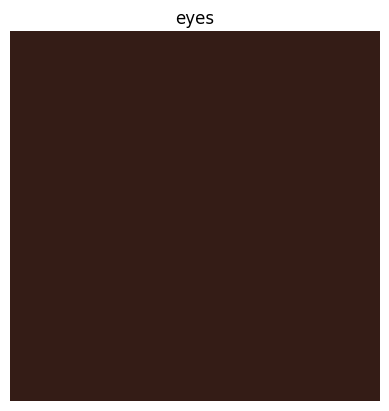

In [368]:
visualize_color(average_eyes_color, "eyes")

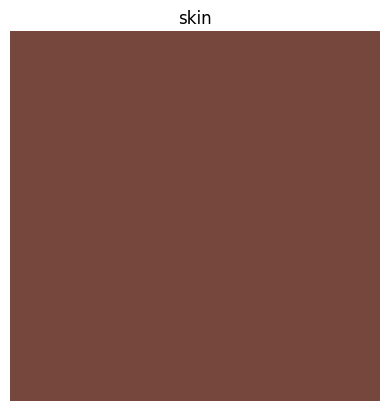

In [369]:
# Using skin as an indicator for the branches of color being warm, cool or neutral.

average_skin_color
visualize_color(average_skin_color, "skin")

In [370]:
def display_colors(color_palette):
    # Number of colors
    num_colors = len(color_palette)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(num_colors, 2))  # Adjust figsize to fit all colors

    # Create an array of color blocks
    color_blocks = np.arange(num_colors)
    color_values = np.array(color_palette) / 255  # Normalize RGB values to [0, 1]

    # Display each color as a block
    ax.bar(color_blocks, height=1, width=1, color=color_values, edgecolor='none')

    # Remove x and y ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Set limits to ensure colors are displayed correctly
    ax.set_xlim(0, num_colors)
    ax.set_ylim(0, 1)

    # Add title
    ax.set_title('Color Palette')

    # Show the plot
    plt.show()

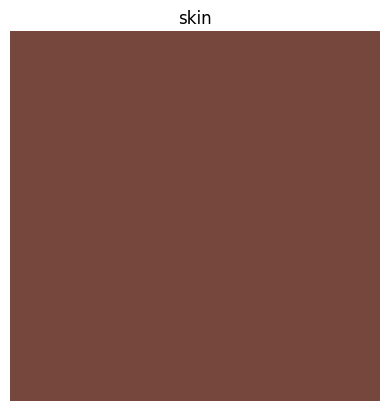

In [371]:
# Using skin as an indicator for the branches of color being warm, cool or neutral.

average_skin_color
visualize_color(average_skin_color, "skin")

Comparison between warm and colors that pop and actual skin tone.

In [372]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler

data = [
    (245, 225, 205, 'Warm'),
    (230, 210, 170, 'Warm'),
    (210, 180, 130, 'Warm'),
    (180, 140, 90, 'Warm'),
    (130, 95, 50, 'Warm'),
    (230, 210, 180, 'Warm'),
    (245, 225, 200, 'Warm'),
    (220, 190, 160, 'Warm'),
    (200, 170, 140, 'Warm'),
    (175, 135, 95, 'Warm'),
    (145, 100, 60, 'Warm'),
    (110, 75, 45, 'Warm'),

    (255, 220, 180, 'Warm'),  # Very light warm
    (240, 200, 160, 'Warm'),  # Light-medium warm
    (225, 185, 140, 'Warm'),  # Medium warm
    (190, 150, 110, 'Warm'),  # Medium-dark warm
    (170, 120, 80, 'Warm'),   # Dark warm
    (140, 95, 60, 'Warm'),    # Very dark warm
    (255, 235, 210, 'Warm'),  # Lightest warm
    (235, 195, 155, 'Warm'),  # Medium warm
    (210, 160, 120, 'Warm'),  # Medium-dark warm
    (185, 130, 90, 'Warm'),   # Dark warm
    (160, 105, 70, 'Warm'),   # Darker warm
    (135, 85, 55, 'Warm'),    # Very dark warm

    (255, 250, 235, 'Warm'),  # Very light warm
    (240, 220, 195, 'Warm'),  # Light-medium warm
    (225, 200, 165, 'Warm'),  # Medium warm
    (200, 175, 140, 'Warm'),  # Medium-dark warm
    (180, 150, 115, 'Warm'),  # Dark warm
    (150, 120, 85, 'Warm'),   # Very dark warm
    (255, 245, 220, 'Warm'),  # Lightest warm
    (245, 210, 175, 'Warm'),  # Medium warm
    (225, 185, 150, 'Warm'),  # Medium-dark warm
    (200, 160, 125, 'Warm'),  # Dark warm
    (175, 140, 100, 'Warm'),  # Darker warm
    (150, 115, 80, 'Warm'),   # Very dark warm
    (255, 240, 200, 'Warm'),  # Light warm
    (240, 210, 175, 'Warm'),  # Light-medium warm
    (225, 190, 155, 'Warm'),  # Medium warm
    (200, 160, 125, 'Warm'),  # Medium-dark warm
    (180, 140, 100, 'Warm'),  # Dark warm
    (150, 110, 75, 'Warm'),   # Darker warm
    (130, 95, 65, 'Warm'),    # Very dark warm
    (245, 225, 190, 'Warm'),  # Lightest warm

    (255, 245, 220, 'Warm'),  # Warm Ivory
    (250, 230, 190, 'Warm'),  # Warm Cream
    (245, 215, 170, 'Warm'),  # Warm Beige
    (235, 200, 145, 'Warm'),  # Warm Sand
    (220, 185, 130, 'Warm'),  # Warm Taupe
    (210, 175, 115, 'Warm'),  # Warm Caramel
    (195, 160, 105, 'Warm'),  # Warm Chestnut
    (180, 145, 95, 'Warm'),   # Warm Cinnamon
    (165, 130, 85, 'Warm'),   # Warm Rust
    (150, 115, 75, 'Warm'),   # Warm Sienna
    (135, 100, 65, 'Warm'),   # Warm Ochre
    (120, 85, 55, 'Warm'),    # Warm Clay
    (110, 75, 50, 'Warm'),    # Warm Walnut
    (95, 65, 45, 'Warm'),     # Warm Cocoa
    (80, 55, 35, 'Warm'),     # Warm Espresso
    (70, 45, 30, 'Warm'),     # Warm Mahogany
    (60, 40, 25, 'Warm'),     # Warm Coffee
    (50, 35, 20, 'Warm'),     # Warm Mocha
    (45, 30, 15, 'Warm'),     # Warm Toffee
    (35, 25, 10, 'Warm'),     # Warm Caramel
    (25, 20, 5, 'Warm'),      # Warm Amber

    # Deep warm tones
    (180, 130, 105, 'Warm'),  # Deep Warm 1
    (165, 120, 95, 'Warm'),   # Deep Warm 2
    (150, 110, 85, 'Warm'),   # Deep Warm 3
    (135, 100, 75, 'Warm'),   # Deep Warm 4
    (120, 90, 65, 'Warm'),    # Deep Warm 5
    (105, 80, 55, 'Warm'),    # Deep Warm 6
    (90, 70, 45, 'Warm'),     # Deep Warm 7
    (75, 60, 35, 'Warm'),     # Deep Warm 8
    (60, 50, 30, 'Warm'),     # Deep Warm 9
    (45, 40, 25, 'Warm'),     # Deep Warm 10

    # Additional variations
    (255, 220, 190, 'Warm'),  # Light Peach
    (240, 210, 175, 'Warm'),  # Light Golden
    (225, 200, 160, 'Warm'),  # Soft Caramel
    (210, 180, 140, 'Warm'),  # Warm Clay
    (190, 160, 120, 'Warm'),  # Golden Beige
    (175, 140, 100, 'Warm'),  # Tan Brown
    (160, 120, 85, 'Warm'),   # Honey Brown
    (145, 105, 70, 'Warm'),   # Warm Ochre
    (130, 90, 55, 'Warm'),    # Rustic Brown
    (115, 75, 45, 'Warm'),    # Medium Cocoa
    (100, 60, 40, 'Warm'),    # Earthy Brown
    (85, 50, 30, 'Warm'),     # Deep Chestnut

    # Additional Asian warm tones
    (255, 240, 220, 'Warm'),   # Warm Ivory
    (240, 215, 195, 'Warm'),   # Light Warm Beige
    (225, 200, 180, 'Warm'),   # Medium Warm Beige
    (210, 185, 165, 'Warm'),   # Medium-Dark Warm Beige
    (195, 170, 150, 'Warm'),   # Warm Tan
    (180, 155, 135, 'Warm'),   # Warm Almond
    (165, 140, 120, 'Warm'),   # Warm Caramel
    (150, 125, 105, 'Warm'),   # Warm Honey
    (135, 110, 90, 'Warm'),    # Warm Toffee
    (120, 95, 75, 'Warm'),     # Warm Bronze
    (105, 80, 60, 'Warm'),     # Warm Cocoa
    (90, 65, 50, 'Warm'),      # Warm Mahogany



    (255, 224, 189, 'Warm'),  # Light warm beige
    (240, 190, 140, 'Warm'),  # Warm peach
    (225, 170, 120, 'Warm'),  # Warm tan
    (210, 150, 100, 'Warm'),  # Warm brown
    (195, 130, 80, 'Warm'),   # Deep warm orange
    (180, 110, 60, 'Warm'),   # Warm caramel
    (165, 90, 50, 'Warm'),    # Rich warm bronze
    (150, 70, 40, 'Warm'),    # Warm mahogany
    (135, 50, 30, 'Warm'),    # Warm auburn
    (120, 40, 20, 'Warm'),     # Deep warm red

    (255, 220, 180, 'Warm'),  # Light Warm Beige
    (245, 200, 150, 'Warm'),  # Warm Sand
    (235, 190, 140, 'Warm'),  # Warm Honey
    (225, 180, 130, 'Warm'),  # Warm Caramel
    (215, 170, 120, 'Warm'),  # Warm Toffee
    (205, 160, 110, 'Warm'),  # Warm Almond
    (195, 150, 100, 'Warm'),  # Warm Mocha
    (185, 140, 90, 'Warm'),   # Warm Cocoa
    (175, 130, 80, 'Warm'),   # Warm Bronze
    (165, 120, 70, 'Warm'),   # Warm Chestnut
    (155, 110, 60, 'Warm'),   # Warm Copper
    (145, 100, 50, 'Warm'),   # Warm Maple



    # Cool undertones
    (240, 210, 210, 'Cool'),
    (210, 185, 170, 'Cool'),
    (190, 160, 150, 'Cool'),
    (150, 100, 90, 'Cool'),
    (110, 75, 70, 'Cool'),
    (245, 225, 230, 'Cool'),
    (255, 240, 250, 'Cool'),
    (230, 200, 210, 'Cool'),
    (210, 180, 185, 'Cool'),
    (180, 150, 155, 'Cool'),
    (140, 105, 110, 'Cool'),
    (100, 70, 75, 'Cool'),

    (255, 230, 235, 'Cool'),  # Very light cool
    (235, 200, 215, 'Cool'),  # Light-medium cool
    (215, 175, 190, 'Cool'),  # Medium cool
    (185, 145, 160, 'Cool'),  # Medium-dark cool
    (160, 120, 135, 'Cool'),  # Dark cool
    (130, 90, 100, 'Cool'),   # Very dark cool
    (255, 225, 245, 'Cool'),  # Lightest cool
    (240, 215, 225, 'Cool'),  # Medium cool
    (220, 195, 205, 'Cool'),  # Medium-dark cool
    (200, 170, 180, 'Cool'),  # Dark cool
    (170, 140, 150, 'Cool'),  # Darker cool
    (145, 110, 120, 'Cool'),  # Very dark cool

    (255, 240, 250, 'Cool'),  # Light cool
    (240, 215, 225, 'Cool'),  # Light-medium cool
    (225, 195, 205, 'Cool'),  # Medium cool
    (210, 170, 180, 'Cool'),  # Medium-dark cool
    (190, 145, 155, 'Cool'),  # Dark cool
    (170, 125, 135, 'Cool'),  # Darker cool
    (145, 100, 110, 'Cool'),  # Very dark cool
    (255, 225, 240, 'Cool'),  # Lightest cool

    (250, 230, 240, 'Cool'),  # Light pastel pink
    (235, 210, 230, 'Cool'),  # Light lavender
    (220, 190, 225, 'Cool'),  # Light mauve
    (205, 175, 220, 'Cool'),  # Medium lavender
    (190, 160, 210, 'Cool'),  # Medium periwinkle
    (175, 145, 200, 'Cool'),  # Medium violet
    (160, 130, 190, 'Cool'),  # Medium purple
    (145, 115, 180, 'Cool'),  # Medium plum
    (130, 100, 170, 'Cool'),  # Dark lavender
    (115, 85, 160, 'Cool'),   # Dark violet
    (100, 70, 150, 'Cool'),   # Dark purple
    (85, 55, 140, 'Cool'),    # Deep purple
    (70, 40, 130, 'Cool'),    # Deep violet
    (55, 30, 120, 'Cool'),    # Very deep purple
    (40, 25, 110, 'Cool'),    # Very deep violet
    (30, 20, 100, 'Cool'),    # Extremely deep purple
    (25, 15, 90, 'Cool'),     # Extremely deep violet
    (20, 10, 80, 'Cool'),     # Almost black violet
    (15, 5, 70, 'Cool'),      # Nearly black purple
    (10, 0, 60, 'Cool'),      # Blackish violet

    # Deep cool tones
    (130, 100, 90, 'Cool'),   # Deep Cool 1
    (115, 85, 75, 'Cool'),    # Deep Cool 2
    (100, 70, 60, 'Cool'),    # Deep Cool 3
    (85, 55, 45, 'Cool'),     # Deep Cool 4
    (70, 40, 30, 'Cool'),     # Deep Cool 5
    (55, 30, 20, 'Cool'),     # Deep Cool 6
    (40, 20, 10, 'Cool'),     # Deep Cool 7
    (30, 15, 10, 'Cool'),     # Deep Cool 8
    (20, 10, 5, 'Cool'),      # Deep Cool 9
    (10, 5, 0, 'Cool'),        # Deep Cool 10

    # Additional Asian cool tones
    (250, 235, 240, 'Cool'),    # Light Pastel Rose
    (235, 220, 230, 'Cool'),    # Light Lilac
    (220, 205, 225, 'Cool'),    # Medium Light Lavender
    (205, 190, 215, 'Cool'),    # Medium Lavender
    (190, 175, 205, 'Cool'),    # Medium Periwinkle
    (175, 160, 195, 'Cool'),    # Medium Violet
    (160, 145, 185, 'Cool'),    # Medium Purple
    (145, 130, 175, 'Cool'),    # Medium Plum
    (130, 115, 165, 'Cool'),    # Dark Lavender
    (115, 100, 155, 'Cool'),    # Dark Violet
    (100, 85, 145, 'Cool'),     # Dark Purple
    (85, 70, 135, 'Cool'),      # Deep Purple
    (70, 55, 125, 'Cool'),      # Deep Violet
    (55, 40, 115, 'Cool'),      # Very Deep Purple
    (40, 30, 105, 'Cool'),      # Very Deep Violet
    (30, 20, 95, 'Cool'),       # Extremely Deep Purple
    (25, 15, 85, 'Cool'),       # Extremely Deep Violet
    (20, 10, 75, 'Cool'),       # Almost Black Violet
    (15, 5, 65, 'Cool'),        # Nearly Black Purple
    (10, 0, 55, 'Cool'),        # Blackish Violet




    # Neutral undertones
    (245, 215, 200, 'Neutral'),
    (225, 190, 160, 'Neutral'),
    (200, 160, 130, 'Neutral'),
    (160, 110, 80, 'Neutral'),
    (120, 80, 60, 'Neutral'),
    (240, 220, 210, 'Neutral'),
    (230, 215, 200, 'Neutral'),
    (215, 190, 175, 'Neutral'),
    (195, 170, 155, 'Neutral'),
    (165, 130, 110, 'Neutral'),
    (135, 95, 80, 'Neutral'),
    (95, 60, 50, 'Neutral'),

    (255, 240, 230, 'Neutral'),  # Very light neutral
    (235, 210, 185, 'Neutral'),  # Light-medium neutral
    (210, 180, 155, 'Neutral'),  # Medium neutral
    (180, 140, 120, 'Neutral'),  # Medium-dark neutral
    (150, 110, 90, 'Neutral'),   # Dark neutral
    (130, 95, 75, 'Neutral'),    # Very dark neutral
    (250, 225, 215, 'Neutral'),  # Lightest neutral
    (230, 200, 180, 'Neutral'),  # Medium neutral
    (200, 170, 150, 'Neutral'),  # Medium-dark neutral
    (180, 150, 130, 'Neutral'),  # Dark neutral
    (155, 125, 105, 'Neutral'),  # Darker neutral
    (125, 95, 75, 'Neutral'),    # Very dark neutral

    (250, 220, 200, 'Neutral'),  # Very light neutral
    (235, 205, 180, 'Neutral'),  # Light-medium neutral
    (220, 190, 165, 'Neutral'),  # Medium neutral
    (200, 170, 150, 'Neutral'),  # Medium-dark neutral
    (180, 150, 130, 'Neutral'),  # Dark neutral
    (160, 130, 105, 'Neutral'),  # Very dark neutral
    (255, 235, 215, 'Neutral'),  # Lightest neutral
    (240, 215, 195, 'Neutral'),  # Medium neutral
    (225, 200, 175, 'Neutral'),  # Medium-dark neutral
    (210, 185, 155, 'Neutral'),  # Dark neutral
    (195, 165, 135, 'Neutral'),  # Darker neutral
    (180, 145, 115, 'Neutral'),  # Very dark neutral

    (240, 230, 220, 'Neutral'),  # Very light neutral
    (225, 210, 195, 'Neutral'),  # Light-medium neutral
    (210, 195, 180, 'Neutral'),  # Medium neutral
    (195, 180, 165, 'Neutral'),  # Medium-dark neutral
    (180, 165, 150, 'Neutral'),  # Dark neutral
    (165, 150, 135, 'Neutral'),  # Very dark neutral
    (150, 135, 120, 'Neutral'),  # Lightest neutral
    (135, 120, 105, 'Neutral'),  # Medium neutral
    (120, 105, 90, 'Neutral'),   # Medium-dark neutral
    (105, 90, 75, 'Neutral'),    # Dark neutral
    (90, 75, 60, 'Neutral'),     # Darker neutral
    (75, 60, 50, 'Neutral'),     # Very dark neutral
    (60, 50, 40, 'Neutral'),     # Deep neutral
    (50, 40, 30, 'Neutral'),     # Very deep neutral
    (40, 30, 20, 'Neutral'),     # Almost black neutral
    (30, 20, 15, 'Neutral'),     # Nearly black neutral
    (20, 15, 10, 'Neutral'),     # Extremely dark neutral
    (15, 10, 5, 'Neutral'),      # Extremely dark neutral
    (10, 5, 0, 'Neutral'),       # Almost black
    (5, 0, 0, 'Neutral'),        # Blackish neutral

    # Rich neutral tones
    (180, 140, 115, 'Neutral'),  # Rich Neutral 1
    (165, 125, 100, 'Neutral'),  # Rich Neutral 2
    (150, 110, 85, 'Neutral'),   # Rich Neutral 3
    (135, 100, 75, 'Neutral'),   # Rich Neutral 4
    (120, 90, 65, 'Neutral'),    # Rich Neutral 5
    (105, 80, 55, 'Neutral'),    # Rich Neutral 6
    (90, 70, 45, 'Neutral'),     # Rich Neutral 7
    (75, 60, 35, 'Neutral'),     # Rich Neutral 8
    (60, 50, 30, 'Neutral'),     # Rich Neutral 9
    (45, 40, 25, 'Neutral'),      # Rich Neutral 10

    # Additional Asian neutral tones
    (245, 230, 215, 'Neutral'),  # Light Neutral Beige
    (230, 210, 200, 'Neutral'),  # Medium Light Neutral
    (215, 195, 180, 'Neutral'),  # Medium Neutral
    (200, 180, 165, 'Neutral'),  # Medium-Dark Neutral
    (185, 165, 150, 'Neutral'),  # Neutral Tan
    (170, 150, 135, 'Neutral'),  # Neutral Almond
    (155, 140, 125, 'Neutral'),  # Neutral Caramel
    (140, 125, 110, 'Neutral'),  # Neutral Honey
    (125, 110, 95, 'Neutral'),   # Neutral Toffee
    (110, 95, 80, 'Neutral'),    # Neutral Bronze
    (95, 80, 65, 'Neutral'),     # Neutral Cocoa
    (80, 65, 50, 'Neutral'),     # Neutral Mahogany

    (245, 215, 200, 'Neutral'),
    (225, 190, 160, 'Neutral'),
    (200, 160, 130, 'Neutral'),
    (160, 110, 80, 'Neutral'),
    (120, 80, 60, 'Neutral'),
    (240, 220, 210, 'Neutral'),
    (230, 215, 200, 'Neutral'),
    (215, 190, 175, 'Neutral'),
    (195, 170, 155, 'Neutral'),
    (165, 130, 110, 'Neutral'),
    (135, 95, 80, 'Neutral'),
    (95, 60, 50, 'Neutral'),
    (255, 240, 230, 'Neutral'),
    (235, 210, 185, 'Neutral'),
    (210, 180, 155, 'Neutral'),
    (180, 140, 120, 'Neutral'),
    (150, 110, 90, 'Neutral'),
    (130, 95, 75, 'Neutral'),
    (250, 225, 215, 'Neutral'),
    (230, 200, 180, 'Neutral'),
    (200, 170, 150, 'Neutral'),
    (180, 150, 130, 'Neutral'),
    (155, 125, 105, 'Neutral'),
    (125, 95, 75, 'Neutral'),
    (250, 220, 200, 'Neutral'),
    (235, 205, 180, 'Neutral'),
    (220, 190, 165, 'Neutral'),
    (200, 170, 150, 'Neutral'),
    (180, 150, 130, 'Neutral'),
    (255, 235, 215, 'Neutral'),
    (240, 215, 195, 'Neutral'),
    (225, 200, 175, 'Neutral'),
    (210, 185, 155, 'Neutral'),
    (195, 165, 135, 'Neutral'),
    (180, 145, 115, 'Neutral'),
    (240, 230, 220, 'Neutral'),
    (225, 210, 195, 'Neutral'),
    (210, 195, 180, 'Neutral'),
    (195, 180, 165, 'Neutral'),
    (180, 165, 150, 'Neutral'),
    (165, 150, 135, 'Neutral'),
    (150, 135, 120, 'Neutral'),
    (135, 120, 105, 'Neutral'),
    (120, 105, 90, 'Neutral'),
    (105, 90, 75, 'Neutral'),
    (90, 75, 60, 'Neutral'),
    (75, 60, 50, 'Neutral'),
    (60, 50, 40, 'Neutral'),
    (50, 40, 30, 'Neutral'),
    (40, 30, 20, 'Neutral'),
    (30, 20, 15, 'Neutral'),
    (20, 15, 10, 'Neutral'),
    (15, 10, 5, 'Neutral'),
    (10, 5, 0, 'Neutral'),
    (5, 0, 0, 'Neutral'),
    (180, 140, 115, 'Neutral'),
    (165, 125, 100, 'Neutral'),
    (150, 110, 85, 'Neutral'),
    (135, 100, 75, 'Neutral'),
    (120, 90, 65, 'Neutral'),
    (105, 80, 55, 'Neutral'),
    (90, 70, 45, 'Neutral'),
    (75, 60, 35, 'Neutral'),
    (60, 50, 30, 'Neutral'),
    (45, 40, 25, 'Neutral'),
    (245, 230, 215, 'Neutral'),
    (230, 210, 200, 'Neutral'),
    (215, 195, 180, 'Neutral'),
    (200, 180, 165, 'Neutral'),
    (185, 165, 150, 'Neutral'),
    (170, 150, 135, 'Neutral'),
    (155, 140, 125, 'Neutral'),
    (140, 125, 110, 'Neutral'),
    (125, 110, 95, 'Neutral'),
    (110, 95, 80, 'Neutral'),
    (95, 80, 65, 'Neutral'),
    (80, 65, 50, 'Neutral'),

    (230, 220, 205, 'Neutral'),  # Soft neutral beige
    (215, 200, 185, 'Neutral'),  # Light neutral brown
    (200, 185, 170, 'Neutral'),  # Neutral tan
    (185, 170, 155, 'Neutral'),  # Medium neutral brown
    (170, 155, 140, 'Neutral'),  # Dark neutral beige
    (155, 140, 125, 'Neutral'),  # Rich neutral brown
    (140, 125, 110, 'Neutral'),  # Deep neutral beige
    (125, 110, 95, 'Neutral'),   # Very deep neutral brown
    (110, 95, 80, 'Neutral'),    # Dark brown
    (95, 80, 65, 'Neutral'),      # Deep brown

    (255, 250, 240, 'Neutral'),  # Very Light Neutral Beige
    (245, 235, 220, 'Neutral'),  # Light Neutral Cream
    (235, 225, 210, 'Neutral'),  # Light Neutral Sand
    (225, 215, 200, 'Neutral'),  # Light Neutral Tan
    (215, 205, 190, 'Neutral'),  # Medium-Light Neutral
    (205, 195, 180, 'Neutral'),  # Medium Neutral Beige
    (195, 185, 170, 'Neutral'),  # Medium Neutral Tan
    (185, 175, 160, 'Neutral'),  # Medium Neutral Buff
    (175, 165, 150, 'Neutral'),  # Medium Neutral Almond
    (165, 155, 140, 'Neutral'),  # Medium Neutral Caramel
    (155, 145, 130, 'Neutral'),  # Medium Neutral Cocoa
    (145, 135, 120, 'Neutral'),  # Medium Neutral Chestnut
    (135, 125, 110, 'Neutral'),  # Medium-Dark Neutral
    (125, 115, 100, 'Neutral'),  # Dark Neutral Tan
    (115, 105, 90, 'Neutral'),   # Dark Neutral Mocha
    (105, 95, 80, 'Neutral'),    # Dark Neutral Coffee
    (95, 85, 70, 'Neutral'),     # Dark Neutral Cocoa
    (85, 75, 60, 'Neutral'),     # Very Dark Neutral
    (75, 65, 50, 'Neutral'),     # Deep Neutral
    (65, 55, 40, 'Neutral'),     # Very Deep Neutral
    (55, 45, 30, 'Neutral'),     # Almost Black Neutral
    (45, 35, 20, 'Neutral'),     # Nearly Black Neutral
    (35, 25, 15, 'Neutral'),     # Extremely Dark Neutral
    (25, 15, 10, 'Neutral'),     # Extremely Dark Neutral


    ]


In [373]:
def remove_duplicates(color_list):
    """
    Removes duplicate color tuples from a list.

    Parameters:
    color_list (list of tuples): A list of color tuples where each tuple is of the form (R, G, B, 'Label').

    Returns:
    list of tuples: A list with duplicates removed.
    """
    # Convert the list of tuples to a set to remove duplicates, then back to a list
    unique_colors = list(set(color_list))
    return unique_colors

dataset = remove_duplicates(data)

In [374]:
# Split data into features (RGB values) and labels (undertones)
X = np.array([d[:3] for d in dataset])  # RGB values
y = np.array([d[3] for d in dataset])   # Undertone labels


# Normalize RGB values to the range [0, 1]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Initialize the StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Perform the split
for train_index, test_index in sss.split(X_normalized, y):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Initialize the K-Nearest Neighbors classifier
# Initialize the K-Nearest Neighbors classifier with the best parameters
knn = KNeighborsClassifier(n_neighbors=4, p=2, weights='distance')

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict the labels on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

        Cool       0.83      0.83      0.83        24
     Neutral       0.66      0.72      0.69        32
        Warm       0.78      0.71      0.75        35

    accuracy                           0.75        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.75      0.75      0.75        91

Accuracy Score: 0.7472527472527473


In [375]:
# Function to classify a new image based on RGB values
def classify_image(average_skin_color):
    # Convert RGB values to normalized format
    rgb_normalized = scaler.transform([average_skin_color])

    # Predict the classification
    prediction = knn.predict(rgb_normalized)
    return prediction[0]


In [376]:
predicted_label = classify_image(average_skin_color)
print(f"The predicted classification for the RGB {average_skin_color} is: {predicted_label}")

The predicted classification for the RGB (118, 72, 61) is: Warm


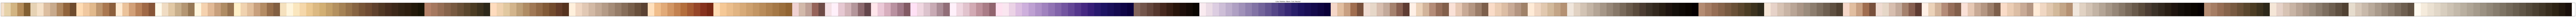

In [377]:
def display_colors_updated(data):
    # Filter colors by labels
    warm_palette = [color[:3] for color in data if color[3] == 'Warm']
    cool_palette = [color[:3] for color in data if color[3] == 'Cool']
    neutral_palette = [color[:3] for color in data if color[3] == 'Neutral']

    # Number of colors in each palette
    num_warm = len(warm_palette)
    num_cool = len(cool_palette)
    num_neutral = len(neutral_palette)

    # Create a figure with an appropriate size to fit all palettes
    fig, ax = plt.subplots(figsize=(num_warm + num_cool + num_neutral, 2))

    # Create arrays for color blocks
    color_blocks_warm = np.arange(num_warm)
    color_blocks_cool = np.arange(num_cool) + num_warm
    color_blocks_neutral = np.arange(num_neutral) + num_warm + num_cool

    # Normalize RGB values to [0, 1]
    color_values_warm = np.array(warm_palette) / 255
    color_values_cool = np.array(cool_palette) / 255
    color_values_neutral = np.array(neutral_palette) / 255

    # Display each color palette
    ax.bar(color_blocks_warm, height=1, width=1, color=color_values_warm, edgecolor='none')
    ax.bar(color_blocks_cool, height=1, width=1, color=color_values_cool, edgecolor='none')
    ax.bar(color_blocks_neutral, height=1, width=1, color=color_values_neutral, edgecolor='none')

    # Remove x and y ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Set limits to ensure colors are displayed correctly
    ax.set_xlim(0, num_warm + num_cool + num_neutral)
    ax.set_ylim(0, 1)

    # Add title
    ax.set_title('Color Palettes: Warm, Cool, Neutral')

    # Show the plot
    plt.show()

display_colors_updated(data)

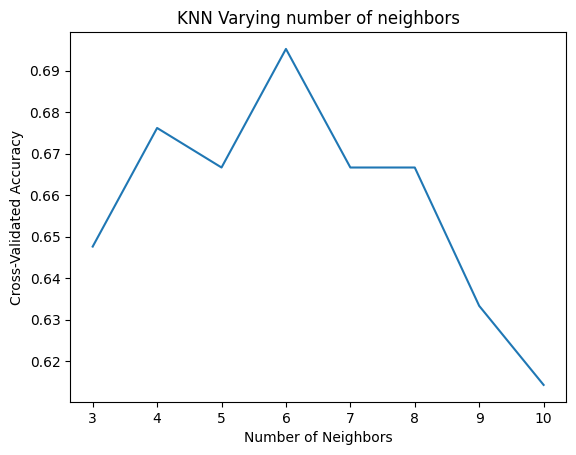

The best number of neighbors is 6 with a cross-validated accuracy of 0.70


In [378]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Trying different values for the number of neighbors
neighbors_range = range(3, 11)
cv_scores = []

for k in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plotting the cross-validation results
plt.plot(neighbors_range, cv_scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Varying number of neighbors')
plt.show()

# Best k
best_k = neighbors_range[np.argmax(cv_scores)]
print(f"The best number of neighbors is {best_k} with a cross-validated accuracy of {max(cv_scores):.2f}")

In [379]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Create a pipeline with scaling and KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define parameter grid with ranges
param_grid = {
    'knn__n_neighbors': np.arange(3, 21),  # Range of neighbors from 1 to 20
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1 for Manhattan, 2 for Euclidean
}

# GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Evaluate on test data
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters: {'knn__n_neighbors': 6, 'knn__p': 2, 'knn__weights': 'uniform'}
Best cross-validation score: 0.6967513085048582
              precision    recall  f1-score   support

        Cool       0.83      0.79      0.81        24
     Neutral       0.58      0.69      0.63        32
        Warm       0.77      0.66      0.71        35

    accuracy                           0.70        91
   macro avg       0.72      0.71      0.71        91
weighted avg       0.72      0.70      0.71        91



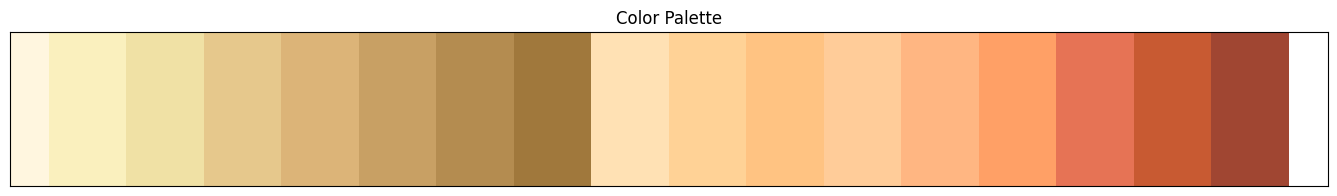

In [380]:
spring_hair = [
    # Light Blonde to Medium Brown Shades
    (255, 246, 223),  # Very Light Blonde
    (250, 240, 190),  # Light Blonde
    (240, 225, 165),  # Blonde
    (230, 200, 140),  # Dark Blonde
    (220, 180, 120),  # Light Brown
    (200, 160, 100),  # Dark Blonde/Light Brown
    (180, 140, 80),   # Medium Brown
    (160, 120, 60),   # Medium Brown

    # Strawberry Blonde Shades
    (255, 225, 180),  # Light Strawberry Blonde
    (255, 210, 150),  # Strawberry Blonde
    (255, 195, 130),  # Dark Strawberry Blonde

    # Golden/Red Undertone Colors
    (255, 204, 153),  # Golden Blonde
    (255, 182, 130),  # Honey Blonde
    (255, 160, 102),  # Light Golden Brown
    (230, 115, 85),   # Light Auburn
    (200, 90, 50),    # Auburn
    (160, 70, 50)     # Dark Auburn
]

display_colors(spring_hair)

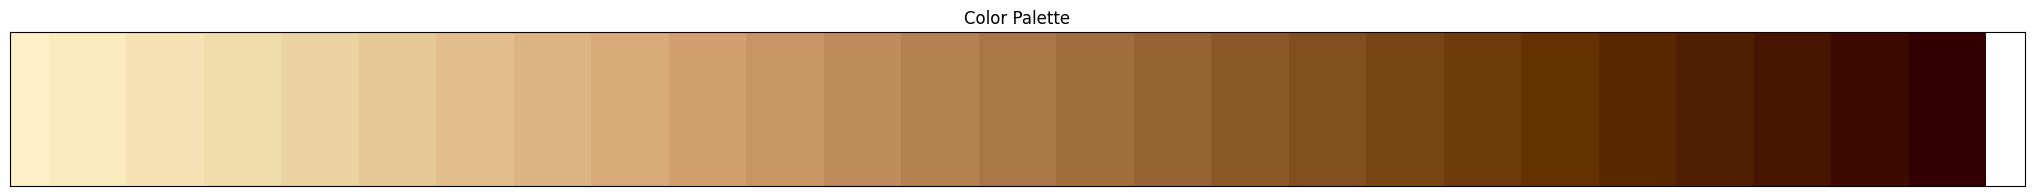

In [381]:
summer_hair = [
    (255, 240, 200),  # Light Blonde
    (250, 235, 190),  # Very Light Blonde (Intermediate)
    (245, 225, 180),  # Very Light Blonde (Intermediate)
    (240, 220, 170),  # Light Blonde (Intermediate)
    (235, 210, 160),  # Light Blonde (Intermediate)
    (230, 200, 150),  # Blonde (Intermediate)
    (225, 190, 140),  # Blonde (Intermediate)
    (220, 180, 130),  # Dark Blonde (Intermediate)
    (215, 170, 120),  # Dark Blonde (Intermediate)
    (210, 160, 110),  # Dark Blonde (Intermediate)
    (200, 150, 100),  # Dark Blonde/Light Brown (Intermediate)
    (190, 140, 90),   # Light Brown (Intermediate)
    (180, 130, 80),   # Light Brown (Intermediate)
    (170, 120, 70),   # Medium Brown (Intermediate)
    (160, 110, 60),   # Medium Brown (Intermediate)
    (150, 100, 50),   # Medium Brown (Intermediate)
    (140, 90, 40),    # Medium Brown (Intermediate)
    (130, 80, 30),    # Dark Ash Brown (Intermediate)
    (120, 70, 20),    # Dark Ash Brown (Intermediate)
    (110, 60, 10),    # Dark Ash Brown (Intermediate)
    (100, 50, 0),     # Dark Ash Brown
    (90, 40, 0),      # Dark Ash Brown
    (80, 30, 0),      # Dark Ash Brown
    (70, 20, 0),      # Dark Ash Brown
    (60, 10, 0),      # Dark Ash Brown
    (50, 0, 0)        # Dark Ash Brown (Deepest shade)
]


display_colors(summer_hair)

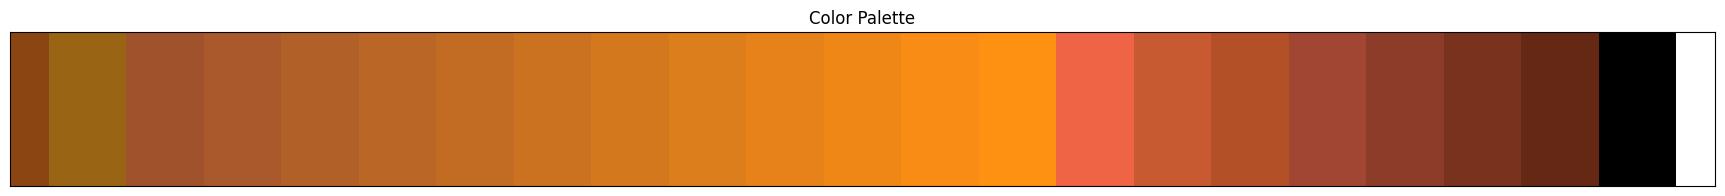

In [382]:
# Extended list of RGB values for autumn hair colors
autumn_hair = [
    (139, 69, 19),    # Saddle Brown (Mid Brown with a hint of red)
    (153, 101, 21),   # Dark Golden Rod (Medium brown with golden undertones)
    (160, 82, 45),    # Sienna (Medium brown with red undertones)
    (169, 89, 43),    # Medium Brown with Red Undertones (Intermediate color)
    (177, 96, 40),    # Red Brown (Intermediate color)
    (185, 102, 38),   # Warm Brown (Intermediate color)
    (194, 108, 35),   # Rich Brown (Intermediate color)
    (203, 114, 33),   # Deep Brown with Red Undertones (Intermediate color)
    (212, 120, 30),   # Dark Auburn (Intermediate color)
    (221, 126, 28),   # Deep Auburn (Intermediate color)
    (230, 130, 25),   # Dark Auburn (Intermediate color)
    (239, 135, 23),   # Dark Auburn with Golden Undertones (Intermediate color)
    (248, 140, 20),   # Deep Red-Brown (Intermediate color)
    (255, 145, 18),   # Auburn Red (Intermediate color)
    (240, 100, 70),   # Auburn (Intermediate color)
    (200, 90, 50),    # Auburn
    (180, 80, 40),    # Auburn (Deepened)
    (160, 70, 50),    # Dark Auburn
    (140, 60, 40),    # Dark Auburn (Intermediate color)
    (120, 50, 30),    # Black with Red Undertones (Intermediate color)
    (100, 40, 20),    # Black (Deepened)
    (0, 0, 0)         # Black (Darkest shade, no undertones)
]
display_colors(autumn_hair)

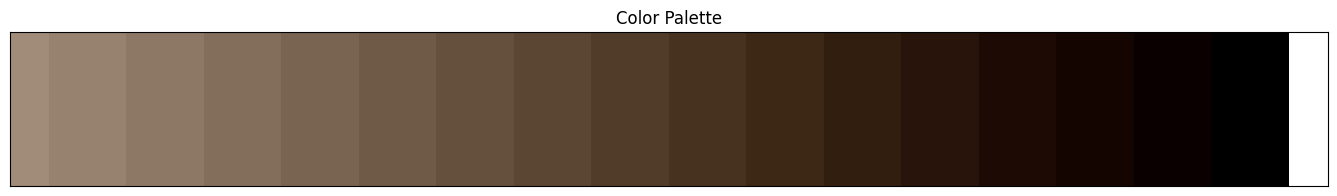

In [383]:
winter_hair = [
    (160, 140, 120),  # Ashy Mid Brown (Starting point)
    (150, 130, 110),  # Ashy Mid Brown (Intermediate)
    (140, 120, 100),  # Ashy Mid Brown (Intermediate)
    (130, 110, 90),   # Ashy Dark Brown (Intermediate)
    (120, 100, 80),   # Ashy Dark Brown (Intermediate)
    (110, 90, 70),    # Dark Ash Brown (Intermediate)
    (100, 80, 60),    # Dark Ash Brown (Intermediate)
    (90, 70, 50),     # Cool Brown (Intermediate)
    (80, 60, 40),     # Cool Brown (Intermediate)
    (70, 50, 30),     # Cool Brown (Intermediate)
    (60, 40, 20),     # Dark Ash Brown (Intermediate)
    (50, 30, 15),     # Dark Ash Brown (Intermediate)
    (40, 20, 10),     # Very Dark Brown (Intermediate)
    (30, 10, 5),      # Very Dark Brown (Intermediate)
    (20, 5, 0),       # Deep Cool Brown (Intermediate)
    (10, 0, 0),       # Near Black (Intermediate)
    (0, 0, 0)         # Black (Deepest shade)
]

display_colors(winter_hair)

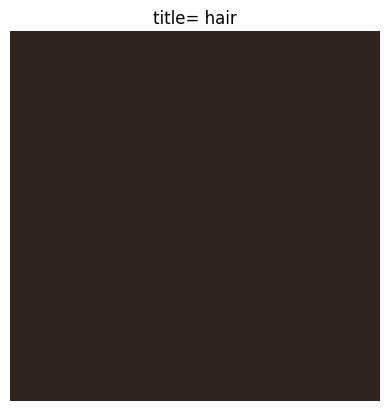

In [384]:
visualize_color(average_hair_color, "title= hair")

In [385]:
spring_hair = [
    (255, 245, 225, 'spring'),  # Very Light Blonde
    (250, 240, 190, 'spring'),  # Light Blonde
    (240, 225, 165, 'spring'),  # Blonde
    (230, 200, 140, 'spring'),  # Dark Blonde
    (220, 180, 120, 'spring'),  # Light Brown
    (200, 160, 100, 'spring'),  # Dark Blonde/Light Brown
    (180, 140, 80, 'spring'),   # Medium Brown
    (160, 120, 60, 'spring'),   # Medium Brown
    (255, 225, 180, 'spring'),  # Light Strawberry Blonde
    (255, 210, 150, 'spring'),  # Strawberry Blonde
    (255, 195, 130, 'spring'),  # Dark Strawberry Blonde
    (255, 204, 153, 'spring'),  # Golden Blonde
    (255, 182, 130, 'spring'),  # Honey Blonde
    (255, 160, 102, 'spring'),  # Light Golden Brown
    (230, 115, 85, 'spring'),   # Light Auburn
    (200, 90, 50, 'spring'),    # Auburn
    (160, 70, 50, 'spring'),    # Dark Auburn
    (245, 230, 190, 'spring'),  # Very Light Blonde (Intermediate)
    (235, 220, 170, 'spring'),  # Blonde (Intermediate)
    (225, 210, 150, 'spring'),  # Dark Blonde (Intermediate)
    (215, 200, 130, 'spring'),  # Light Brown (Intermediate)
    (205, 190, 110, 'spring'),  # Medium Brown (Intermediate)
    (195, 180, 90, 'spring'),   # Medium Brown (Intermediate)
    (185, 170, 70, 'spring'),   # Dark Blonde (Intermediate)
    (175, 160, 50, 'spring'),   # Light Auburn (Intermediate)
    (165, 150, 40, 'spring')    # Auburn (Intermediate)
]

summer_hair = [
    (255, 240, 200, 'summer'),  # Light Blonde
    (250, 235, 190, 'summer'),  # Very Light Blonde
    (245, 225, 180, 'summer'),  # Very Light Blonde
    (240, 220, 170, 'summer'),  # Light Blonde
    (235, 210, 160, 'summer'),  # Light Blonde
    (230, 200, 150, 'summer'),  # Blonde
    (225, 190, 140, 'summer'),  # Blonde
    (220, 180, 130, 'summer'),  # Dark Blonde
    (215, 170, 120, 'summer'),  # Dark Blonde
    (210, 160, 110, 'summer'),  # Dark Blonde
    (200, 150, 100, 'summer'),  # Dark Blonde/Light Brown
    (190, 140, 90, 'summer'),   # Light Brown
    (180, 130, 80, 'summer'),   # Light Brown
    (170, 120, 70, 'summer'),   # Medium Brown
    (160, 110, 60, 'summer'),   # Medium Brown
    (150, 100, 50, 'summer'),   # Medium Brown
    (140, 90, 40, 'summer'),    # Medium Brown
    (130, 80, 30, 'summer'),    # Ash Brown
    (120, 70, 20, 'summer'),    # Ash Brown
    (110, 60, 10, 'summer'),    # Ash Brown
    (100, 50, 0, 'summer'),     # Ash Brown
    (90, 40, 0, 'summer'),      # Ash Brown
    (80, 30, 0, 'summer'),      # Ash Brown
    (70, 20, 0, 'summer'),      # Ash Brown
    (60, 10, 0, 'summer'),      # Ash Brown
    (50, 0, 0, 'summer')        # Ash Brown (Deepest shade)
]

autumn_hair = [
    (139, 69, 19, 'autumn'),    # Saddle Brown
    (153, 101, 21, 'autumn'),   # Dark Golden Rod
    (160, 82, 45, 'autumn'),    # Sienna
    (169, 89, 43, 'autumn'),    # Medium Brown with Red Undertones
    (177, 96, 40, 'autumn'),    # Red Brown
    (185, 102, 38, 'autumn'),   # Warm Brown
    (194, 108, 35, 'autumn'),   # Rich Brown
    (203, 114, 33, 'autumn'),   # Deep Brown with Red Undertones
    (212, 120, 30, 'autumn'),   # Dark Auburn
    (221, 126, 28, 'autumn'),   # Deep Auburn
    (230, 130, 25, 'autumn'),   # Dark Auburn
    (239, 135, 23, 'autumn'),   # Dark Auburn with Golden Undertones
    (248, 140, 20, 'autumn'),   # Deep Red-Brown
    (255, 145, 18, 'autumn'),   # Auburn Red
    (240, 100, 70, 'autumn'),   # Auburn
    (200, 90, 50, 'autumn'),    # Auburn
    (180, 80, 40, 'autumn'),    # Auburn
    (160, 70, 50, 'autumn'),    # Dark Auburn
    (140, 60, 40, 'autumn'),    # Dark Auburn
    (120, 50, 30, 'autumn'),    # Black with Red Undertones
    (100, 40, 20, 'autumn'),    # Black
    (0, 0, 0, 'autumn')        # Black (Deepest shade)
]

winter_hair = [
    (160, 140, 120, 'winter'),  # Ashy Mid Brown
    (150, 130, 110, 'winter'),  # Ashy Mid Brown
    (140, 120, 100, 'winter'),  # Ashy Mid Brown
    (130, 110, 90, 'winter'),   # Ashy Dark Brown
    (120, 100, 80, 'winter'),   # Ashy Dark Brown
    (110, 90, 70, 'winter'),    # Dark Ash Brown
    (100, 80, 60, 'winter'),    # Dark Ash Brown
    (90, 70, 50, 'winter'),     # Cool Brown
    (80, 60, 40, 'winter'),     # Cool Brown
    (70, 50, 30, 'winter'),     # Cool Brown
    (60, 40, 20, 'winter'),     # Dark Ash Brown
    (50, 30, 15, 'winter'),     # Dark Ash Brown
    (40, 20, 10, 'winter'),     # Very Dark Brown
    (30, 10, 5, 'winter'),      # Very Dark Brown
    (20, 5, 0, 'winter'),       # Deep Cool Brown
    (10, 0, 0, 'winter'),       # Near Black
    (0, 0, 0, 'winter')         # Black (Deepest shade)
]

data = (
    spring_hair +
    summer_hair +
    autumn_hair +
    winter_hair
)


In [386]:
# Check if the hair array is all zeros
if np.all(hair == 0):
    print("No hair detected in this image, skipping...")
else:
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import Pipeline
    from sklearn.metrics import accuracy_score, classification_report

    # Example of how to represent hair and eyebrow colors and the corresponding undertone
    # Each entry in `data` is (R_hair, G_hair, B_hair, label)


    # Split data into features (RGB values) and labels (undertones)
    X_hair = np.array([d[:3] for d in data])  # RGB values for hair
    y_labels = np.array([d[3] for d in data])  # Undertone labels

    # Assuming the eyebrow data is similar to hair, we'll use the same `data` for demonstration
    X_eyebrow = np.array([d[:3] for d in data])  # RGB values for eyebrows

    # Combine hair and eyebrow features with heavier weight on hair color
    # Here, we're emphasizing hair by duplicating its values in the feature vector
    X_combined = np.hstack((X_hair, X_hair, X_eyebrow))  # Hair repeated twice for emphasis

    # Split the combined dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_combined, y_labels, test_size=0.3, random_state=42)

    # Optional: Print shapes to verify
    print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")
    print(f"Training labels shape: {y_train.shape}, Test labels shape: {y_test.shape}")

    # Initialize the k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=6)

    # Fit the model with training data
    knn.fit(X_train, y_train)

    # Predict undertones on the test set
    y_pred = knn.predict(X_test)

    # Print accuracy and classification report
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))




    # Combine the input features as done in training
    input_features = np.hstack((average_hair_color, average_hair_color, average_brows_color))

    predicted_hair_type = knn.predict([input_features])
    print(f"The predicted classification based on hair and eyebrow color is: {predicted_hair_type[0]}")

    # Create a pipeline with scaling and KNN
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ])

    # Define parameter grid with ranges
    param_grid = {
        'knn__n_neighbors': np.arange(3, 21),  # Range of neighbors from 3 to 20
        'knn__weights': ['uniform', 'distance'],
        'knn__p': [1, 2]  # 1 for Manhattan, 2 for Euclidean
    }

    # GridSearchCV to find the best parameters
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Best parameters and score
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_}")

    # Evaluate on test data
    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred))

Training data shape: (63, 9), Test data shape: (28, 9)
Training labels shape: (63,), Test labels shape: (28,)
Accuracy: 0.7857142857142857

Classification Report:
               precision    recall  f1-score   support

      autumn       0.80      1.00      0.89         8
      spring       0.64      0.88      0.74         8
      summer       1.00      0.44      0.62         9
      winter       1.00      1.00      1.00         3

    accuracy                           0.79        28
   macro avg       0.86      0.83      0.81        28
weighted avg       0.84      0.79      0.77        28

The predicted classification based on hair and eyebrow color is: winter
Best parameters: {'knn__n_neighbors': 5, 'knn__p': 2, 'knn__weights': 'distance'}
Best cross-validation score: 0.6512820512820513
              precision    recall  f1-score   support

      autumn       0.80      1.00      0.89         8
      spring       0.60      0.75      0.67         8
      summer       0.80      0.44   

In [387]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report

# Split data into features (RGB values) and labels (season labels)
X = np.array([d[:3] for d in dataset])  # RGB values
y = np.array([d[3] for d in dataset])   # Season labels

# Normalize RGB values to the range [0, 1]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Initialize the StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Perform the split
for train_index, test_index in sss.split(X_normalized, y):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Initialize the K-Nearest Neighbors classifier
knn_rgb = KNeighborsClassifier(n_neighbors=4, p=2, weights='distance')

# Fit the model on the training data
knn_rgb.fit(X_train, y_train)

# Predict the labels on the test data
y_pred_rgb = knn_rgb.predict(X_test)

# Evaluate the model
print("Skin tone:\n", classification_report(y_test, y_pred_rgb))
print("Skin tone:", accuracy_score(y_test, y_pred_rgb))

# Normalize the new RGB value
average_skin_color_normalized = scaler.transform([average_skin_color])

# Predict the classification of the new average skin color
predicted_classification = knn_rgb.predict(average_skin_color_normalized)

# Output the prediction result
print(f"The classification for the given average skin color RGB values is: {predicted_classification[0]}")

Skin tone:
               precision    recall  f1-score   support

        Cool       0.83      0.83      0.83        24
     Neutral       0.66      0.72      0.69        32
        Warm       0.78      0.71      0.75        35

    accuracy                           0.75        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.75      0.75      0.75        91

Skin tone: 0.7472527472527473
The classification for the given average skin color RGB values is: Warm


In [388]:
# Example data for hair and eyebrows (similar structure as above)
# Extract features and labels
X_hair = np.array([d[:3] for d in data])  # RGB values for hair
y_labels = np.array([d[3] for d in data])  # Season labels

# Combine hair and eyebrow features
X_combined = np.hstack((X_hair, X_hair))  # Example: Hair features repeated for emphasis

# Split the combined dataset into training and test sets
X_train_hair, X_test_hair, y_train_hair, y_test_hair = train_test_split(X_combined, y_labels, test_size=0.3, random_state=42)

# Initialize and train the K-Nearest Neighbors classifier
knn_hair = KNeighborsClassifier(n_neighbors=6)
knn_hair.fit(X_train_hair, y_train_hair)

# Predict with the hair and eyebrow model
y_pred_hair = knn_hair.predict(X_test_hair)

# Evaluate the model
print("Hair and Eyebrow Classification Report:\n", classification_report(y_test_hair, y_pred_hair))
print("Hair and Eyebrow Accuracy Score:", accuracy_score(y_test_hair, y_pred_hair))

Hair and Eyebrow Classification Report:
               precision    recall  f1-score   support

      autumn       0.80      1.00      0.89         8
      spring       0.64      0.88      0.74         8
      summer       1.00      0.44      0.62         9
      winter       1.00      1.00      1.00         3

    accuracy                           0.79        28
   macro avg       0.86      0.83      0.81        28
weighted avg       0.84      0.79      0.77        28

Hair and Eyebrow Accuracy Score: 0.7857142857142857


In [389]:
# If using hair and eyebrow combined features, repeat the new data for simplicity
new_data_combined = np.hstack((average_hair_color, average_brows_color)).reshape(1, -1)  # Combine and reshape for prediction

# Predict using the trained model
new_prediction = knn_hair.predict(new_data_combined)

# Output the prediction result
print(f"The classification for the given average hair and eyebrow RGB values is: {new_prediction[0]}")

The classification for the given average hair and eyebrow RGB values is: winter


In [390]:
print(f"The classification for the given average hair and eyebrow RGB values is: {new_prediction[0].capitalize()}")
print(f"The classification for the given average skin color RGB values is: {predicted_classification[0].capitalize()}")

The classification for the given average hair and eyebrow RGB values is: Winter
The classification for the given average skin color RGB values is: Warm


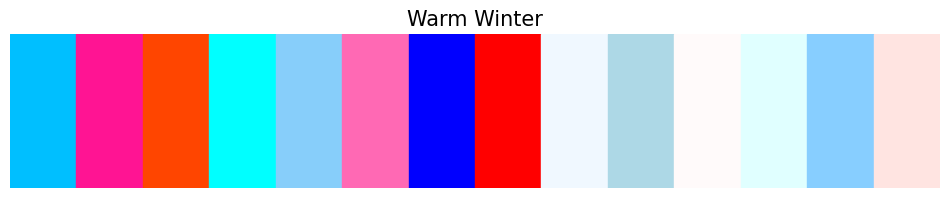

In [391]:
import matplotlib.pyplot as plt

# Define the color palette
warm_winter_palette = [
    (0, 191, 255),    # Deep Sky Blue
    (255, 20, 147),   # Deep Pink
    (255, 69, 0),     # Red-Orange
    (0, 255, 255),    # Cyan
    (135, 206, 250),  # Light Sky Blue
    (255, 105, 180),  # Hot Pink
    (0, 0, 255),      # Blue
    (255, 0, 0),      # Red
    (240, 248, 255),  # Alice Blue
    (173, 216, 230),  # Light Blue
    (255, 250, 250),  # Snow
    (224, 255, 255),  # Light Cyan
    (135, 206, 255),  # Sky Blue
    (255, 228, 225)   # Misty Rose
]

# Function to visualize the color palette
def visualize_color(palette, title="Color Palette"):
    fig, ax = plt.subplots(figsize=(12, 2))
    ax.set_xlim(0, len(palette))
    ax.set_ylim(0, 1)
    ax.set_title(title, fontsize=15)

    for i, color in enumerate(palette):
        # Normalize RGB values to [0, 1] for matplotlib
        normalized_color = tuple([value / 255 for value in color])
        rect = plt.Rectangle((i, 0), 1, 1, color=normalized_color)
        ax.add_patch(rect)

    ax.axis('off')
    plt.show()

# Visualize the bright winter color palette
visualize_color(warm_winter_palette, "Warm Winter")


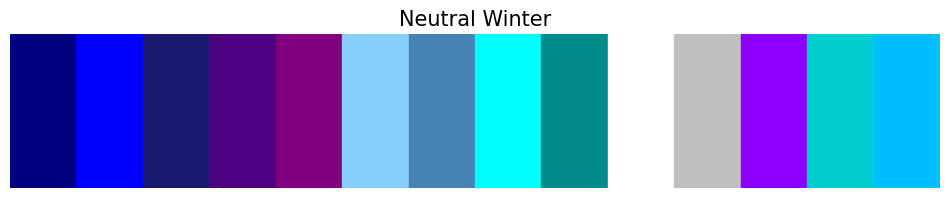

In [392]:
neutral_winter_palette = [
    (0, 0, 128),      # Navy
    (0, 0, 255),      # Blue
    (25, 25, 112),    # Midnight Blue
    (75, 0, 130),     # Indigo
    (128, 0, 128),    # Purple
    (135, 206, 250),  # Light Sky Blue
    (70, 130, 180),   # Steel Blue
    (0, 255, 255),    # Cyan
    (0, 139, 139),    # Dark Cyan
    (255, 255, 255),  # White
    (192, 192, 192),  # Silver
    (139, 0, 255),    # Dark Violet
    (0, 206, 209),    # Dark Turquoise
    (0, 191, 255)     # Deep Sky Blue
]

# Visualize the neutral winter color palette (if you wish)
visualize_color(neutral_winter_palette, "Neutral Winter")

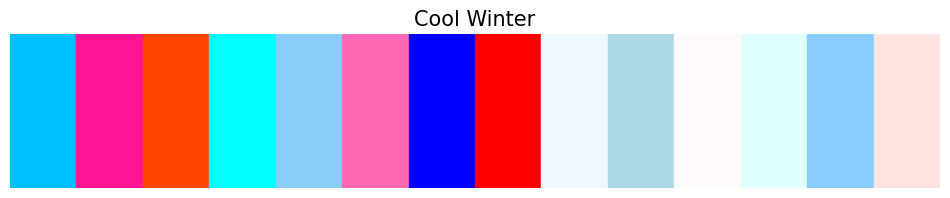

In [393]:
cool_winter_palette = [
    (48, 25, 52),     # Deep Plum
    (72, 61, 139),    # Dark Slate Blue
    (80, 0, 128),     # Dark Purple
    (47, 79, 79),     # Dark Slate Gray
    (64, 64, 64),     # Charcoal Gray
    (0, 0, 128),      # Navy
    (128, 0, 128),    # Purple
    (0, 139, 139),    # Dark Cyan
    (139, 69, 19),    # Saddle Brown
    (102, 51, 153),   # Rebecca Purple
    (105, 105, 105),  # Dim Gray
    (0, 0, 139),      # Dark Blue
    (139, 0, 0),      # Dark Red
    (46, 139, 87)     # Sea Green
]

# Visualize the deep winter color palette (if you wish)
visualize_color(warm_winter_palette, "Cool Winter")

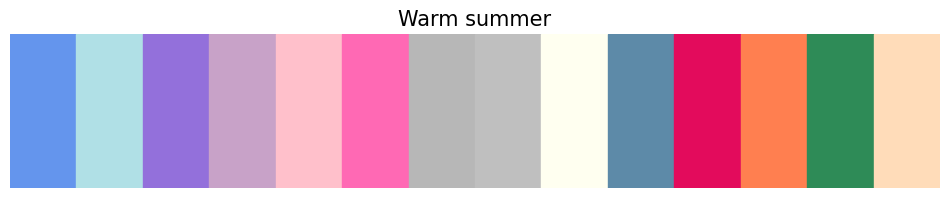

In [394]:
# Define the True Summer color palette
warm_summer_palette = [
    # Muted Blues
    (100, 149, 237),  # Cornflower Blue (muted blue)
    (176, 224, 230),  # Powder Blue (pastel blue)

    # Muted Purples
    (147, 112, 219),  # Medium Purple
    (200, 162, 200),  # Lilac (pastel purple)

    # Muted Pinks
    (255, 192, 203),  # Light Pink (muted pink)
    (255, 105, 180),  # Hot Pink (lighter pink)

    # Neutrals
    (183, 183, 183),  # Pearl Grey
    (191, 191, 191),  # Dove Grey
    (255, 255, 240),  # Ivory

    # Air Force Blue
    (93, 138, 168),  # Air Force Blue

    # Light Reds
    (227, 11, 92),   # Raspberry
    (255, 127, 80),  # Coral

    # Pastels
    (46, 139, 87),   # Sea Green (pastel green)
    (255, 220, 185)  # Nude Pink (pastel pink)
]

visualize_color(warm_summer_palette, "Warm summer")

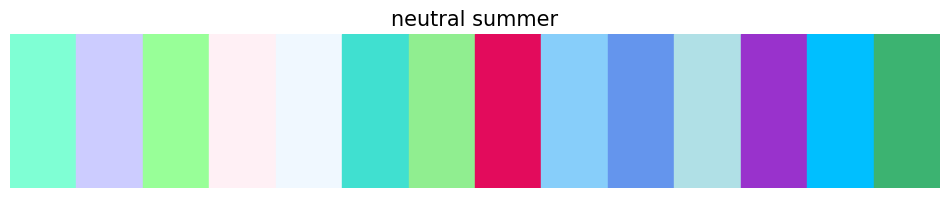

In [395]:
neutral_summer_palette = [
    # Light Summer Pastels (5 colors)
    (127, 255, 212),  # Aquamarine Blue
    (204, 204, 255),  # Light Purple (Wisteria or Lavender)
    (152, 255, 152),  # Mint Green
    (255, 240, 245),  # Lavender Blush (light pink)
    (240, 248, 255),  # Alice Blue (pale blue)

    # Cool Summer Colors (5 colors)
    (64, 224, 208),   # Tiffany Blue
    (144, 238, 144),  # Light Green
    (227, 11, 92),    # Raspberry Red
    (135, 206, 250),  # Light Sky Blue
    (100, 149, 237),  # Cornflower Blue

    # Additional colors to balance to 14 (4 colors)
    (176, 224, 230),  # Powder Blue (cool pastel blue)
    (153, 50, 204),   # Dark Orchid (brighter purple)
    (0, 191, 255),    # Deep Sky Blue (brighter blue)
    (60, 179, 113)    # Medium Sea Green (pastel green)
]

visualize_color(neutral_summer_palette, "neutral summer")

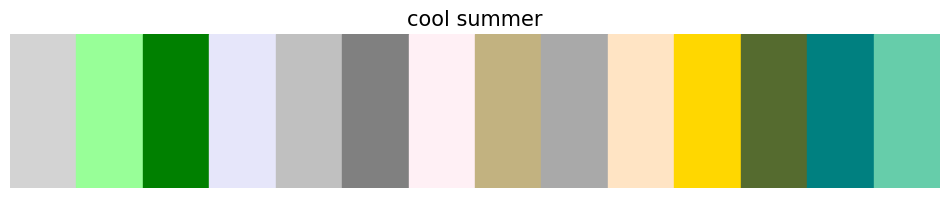

In [396]:
cool_summer_palette = [
    # Cool and Pale Shades
    (211, 211, 211),  # Light Grey
    (152, 255, 152),  # Mint Green
    (0, 128, 0),      # Military Green
    (230, 230, 250),  # Lavender (pale purple)
    (192, 192, 192),  # Silver
    (128, 128, 128),  # Grey
    (255, 240, 245),  # Lavender Blush (pale pink)

    # Autumnal Shades
    (194, 178, 128),  # Sand
    (169, 169, 169),  # Warm Dove Grey
    (255, 228, 196),  # Bisque (warm beige)

    # Additional Colors
    (255, 215, 0),    # Gold
    (85, 107, 47),    # Dark Olive Green
    (0, 128, 128),    # Teal
    (102, 205, 170)   # Medium Aquamarine
]

visualize_color(cool_summer_palette, "cool summer")

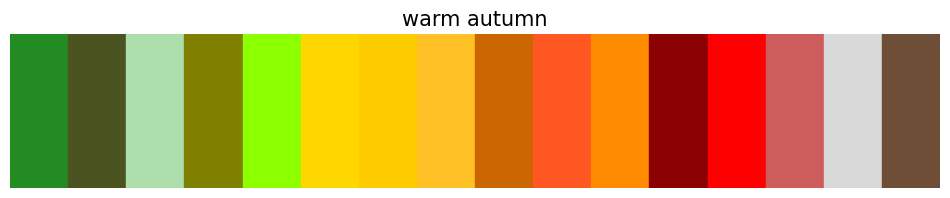

In [397]:
warm_autumn_palette = [
    # Warm Greens
    (34, 139, 34),    # Forest Green
    (75, 83, 32),     # Army Green
    (173, 223, 173),  # Moss Green
    (128, 128, 0),    # Olive Green
    (140, 255, 0),    # Kiwi Green

    # Golden Yellows
    (255, 215, 0),    # Gold
    (255, 204, 0),    # Golden Yellow
    (255, 193, 37),   # Sunflower Yellow

    # Terracotta and Burnt Oranges
    (204, 102, 0),    # Terracotta
    (255, 87, 34),    # Burnt Orange
    (255, 140, 0),    # Dark Orange

    # Deep Reds
    (139, 0, 0),      # Dark Red
    (255, 0, 0),      # Red
    (205, 92, 92),     # Indian Red

    # Oyster
    (217, 217, 217),  # Oyster (light grey)

    # Coffee Brown
    (111, 78, 55)     # Coffee Brown
]

visualize_color(warm_autumn_palette, "warm autumn")

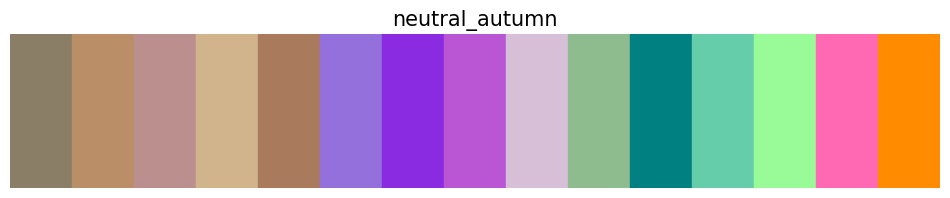

In [398]:
neutral_autumn_palette = [
    # Taupes and Soft Browns
    (139, 126, 102),  # Taupe
    (186, 143, 103),  # Light Coffee
    (188, 143, 143),  # Rosy Brown
    (210, 180, 140),  # Light Tan
    (169, 123, 92),   # Walnut Brown

    # Soft Purples
    (147, 112, 219),  # Medium Purple
    (138, 43, 226),   # Blue Violet
    (186, 85, 211),   # Medium Orchid
    (216, 191, 216),  # Thistle (light lavender)

    # Soft Greens and Teals
    (143, 188, 143),  # Pale Green
    (0, 128, 128),    # Teal
    (102, 205, 170),  # Medium Aquamarine
    (152, 251, 152),   # Pale Green

    # Accent Colors
    (255, 105, 180),  # Hot Pink (Accent)
    (255, 140, 0)     # Dark Orange (Accent)
]

visualize_color(neutral_autumn_palette, "neutral_autumn")

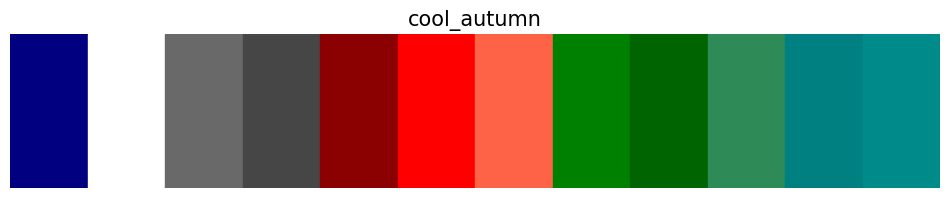

In [399]:
cool_autumn_palette = [
    # Deep Neutrals
    (0, 0, 128),      # Warm Navy
    (255, 255, 255),  # Soft White
    (105, 105, 105),  # Dim Grey
    (70, 70, 70),     # Dark Grey

    # Bold Reds
    (139, 0, 0),      # Dark Red
    (255, 0, 0),      # Red
    (255, 99, 71),    # Tomato

    # Deep Greens
    (0, 128, 0),      # Green
    (0, 100, 0),      # Dark Green
    (46, 139, 87),    # Sea Green

    # Teals
    (0, 128, 128),    # Teal
    (0, 139, 139)     # Dark Cyan
]

visualize_color(cool_autumn_palette, "cool_autumn")

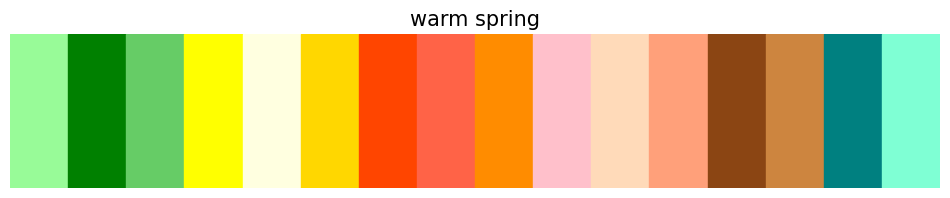

In [400]:
warm_spring_palette = [
    # Warm Greens
    (152, 251, 152),  # Pale Green
    (0, 128, 0),      # Green
    (102, 204, 102),  # Medium Spring Green

    # Yellows
    (255, 255, 0),    # Yellow
    (255, 255, 224),  # Light Yellow
    (255, 215, 0),    # Gold

    # Orangey Reds
    (255, 69, 0),     # Red-Orange (or Tomato)
    (255, 99, 71),    # Tomato
    (255, 140, 0),    # Dark Orange

    # Peachy Pinks
    (255, 192, 203),  # Pink
    (255, 218, 185),  # Peach Puff
    (255, 160, 122),  # Light Salmon

    # Browns
    (139, 69, 19),    # Saddle Brown
    (205, 133, 63),    # Peru

     # Teal and Aquamarine
    (0, 128, 128),    # Teal
    (127, 255, 212)   # Aquamarine
]

visualize_color(warm_spring_palette, "warm spring")

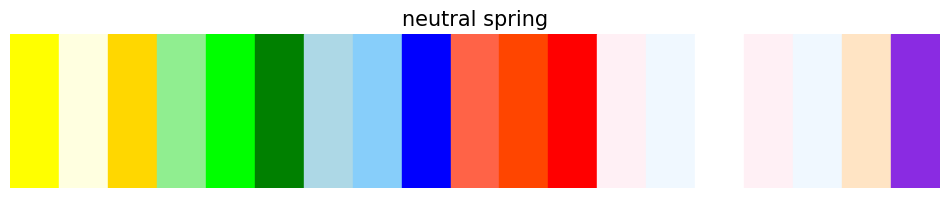

In [401]:
# Define the Neutral Spring color palette with exactly 14 colors
neutral_spring_palette = [
    # Bright and Warm Yellows
    (255, 255, 0),    # Yellow
    (255, 255, 224),  # Light Yellow
    (255, 215, 0),    # Gold

    # Bright and Warm Greens
    (144, 238, 144),  # Light Green
    (0, 255, 0),      # Lime
    (0, 128, 0),      # Green

    # Bright and Warm Blues
    (173, 216, 230),  # Light Blue
    (135, 206, 250),  # Light Sky Blue
    (0, 0, 255),      # Blue

    # Bright and Warm Reds
    (255, 99, 71),    # Tomato
    (255, 69, 0),     # Red-Orange
    (255, 0, 0),      # Red

    # Neutrals
    (255, 240, 245),  # Lavender Blush
    (240, 248, 255),  # Alice Blue
    (255, 255, 255),   # White

    # Neutrals
    (255, 240, 245),  # Lavender Blush
    (240, 248, 255),  # Alice Blue
    (255, 228, 196),  # Biscotti
    (138, 43, 226)    # Violet Island Bird
]


visualize_color(neutral_spring_palette, "neutral spring")

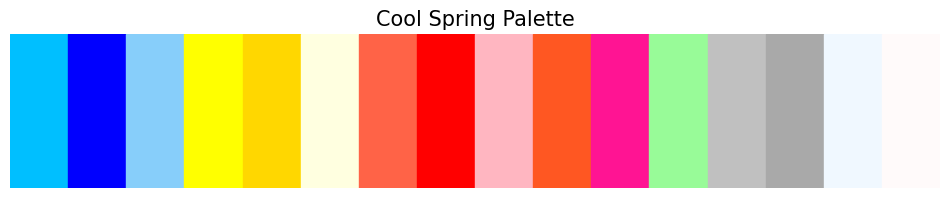

In [402]:
cool_spring_palette = [
    # Clear and Bright Blues
    (0, 191, 255),    # Deep Sky Blue
    (0, 0, 255),      # Blue
    (135, 206, 250),  # Light Sky Blue

    # Sharp Yellows
    (255, 255, 0),    # Yellow
    (255, 215, 0),    # Gold
    (255, 255, 224),  # Light Yellow

    # Almost-Neon Pinks and related
    (255, 99, 71),    # Tomato (Bright red-orange)
    (255, 0, 0),      # Red
    (255, 182, 193),  # Light Pink
    (255, 87, 34),    # Strawberry

    # Additional Colors
    (255, 20, 147),   # Deep Pink (Confetti)
    (152, 251, 152),  # Mint
    (192, 192, 192),  # Silver Marl
    (169, 169, 169),  # Dove Grey

    # Neutrals
    (240, 248, 255),  # Alice Blue
    (255, 250, 250)   # Snow
]

visualize_color(cool_spring_palette, "Cool Spring Palette")

In [403]:
predicted_classification[0]

'Warm'

In [404]:
def color_palette_recommendation(predicted_classification, new_prediction):
    """
    Recommend a color palette based on the predicted skin tone and season classification.

    Args:
    predicted_classification (list of str): List containing the predicted skin tone.
    new_prediction (list of str): List containing the predicted season.

    Returns:
    list of tuple: The recommended color palette.
    """
    # Define the color palettes
    palettes = {
        ("warm", "spring"): warm_spring_palette,
        ("warm", "autumn"): warm_autumn_palette,
        ("warm", "summer"): warm_summer_palette,
        ("warm", "winter"): warm_winter_palette,
        ("neutral", "spring"): neutral_spring_palette,
        ("neutral", "autumn"): neutral_autumn_palette,
        ("neutral", "summer"): neutral_summer_palette,
        ("neutral", "winter"): neutral_winter_palette,
        ("cool", "spring"): cool_spring_palette,
        ("cool", "autumn"): cool_autumn_palette,
        ("cool", "summer"): cool_summer_palette,
        ("cool", "winter"): cool_winter_palette

    }

    # Extract skin tone and season from predictions
    skin_tone = predicted_classification[0].lower()
    season = new_prediction[0].lower()

    # Lookup the appropriate palette
    return palettes.get((skin_tone, season), [])

def visualize_color(palette, title):
    """
    Visualize the color palette.

    Args:
    palette (list of tuple): The color palette to visualize.
    title (str): The title for the visualization.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 2))
    plt.imshow([palette], aspect='auto')
    plt.title(title)
    plt.axis('off')
    plt.show()


The classification for the given average hair and eyebrow RGB values is: Winter
The classification for the given average skin color RGB values is: Warm


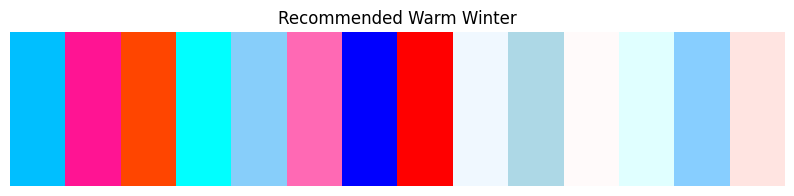

In [405]:
print(f"The classification for the given average hair and eyebrow RGB values is: {new_prediction[0].capitalize()}")
print(f"The classification for the given average skin color RGB values is: {predicted_classification[0].capitalize()}")

# Get the recommended color palette
recommended_palette = color_palette_recommendation(predicted_classification, new_prediction)

# Visualize the recommended palette
visualize_color(recommended_palette, f"Recommended {predicted_classification[0].capitalize()} {new_prediction[0].capitalize()}")